<a href="https://colab.research.google.com/github/nijatmaharramov/Computer_Vision_Projects/blob/main/Predicting_Calorie_Expenditure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing, analyzing and cleaning dataset

In [ ]:
import kagglehub

path = kagglehub.dataset_download("adilshamim8/predict-calorie-expenditure")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/predict-calorie-expenditure


In [ ]:
df1 = pd.read_csv('/kaggle/input/predict-calorie-expenditure/train.csv')
df1.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
# I'll work with 100000 random chosen samples because of the computational complexity
df = df1.sample(n=100000, random_state=42)
df

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
404846,404846,female,56,163.0,61.0,29.0,108.0,40.8,200.0
580313,580313,male,44,179.0,87.0,13.0,94.0,40.3,64.0
552086,552086,male,41,186.0,84.0,10.0,89.0,39.9,39.0
370876,370876,female,38,161.0,58.0,19.0,98.0,40.6,103.0
239330,239330,male,57,181.0,77.0,9.0,98.0,40.0,52.0
...,...,...,...,...,...,...,...,...,...
344642,344642,female,61,170.0,71.0,12.0,90.0,40.0,59.0
59100,59100,male,36,188.0,86.0,27.0,112.0,40.7,200.0
459049,459049,female,20,172.0,64.0,5.0,88.0,38.9,20.0
164187,164187,male,30,162.0,67.0,2.0,78.0,37.8,3.0


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,100000.0,374590.797150,216101.997981,7.0,186789.75,375042.5,561439.75,749991.0
Age,100000.0,41.458110,15.180905,20.0,28.00,40.0,52.00,79.0
Height,100000.0,174.675080,12.836488,126.0,164.00,174.0,185.00,217.0
Weight,100000.0,75.130930,14.001750,40.0,63.00,74.0,87.00,132.0
Duration,100000.0,15.426450,8.351611,1.0,8.00,15.0,23.00,30.0
Heart_Rate,100000.0,95.489160,9.438850,67.0,88.00,95.0,103.00,128.0
Body_Temp,100000.0,40.037714,0.779427,37.1,39.60,40.3,40.70,41.5
Calories,100000.0,88.327500,62.324396,1.0,34.00,77.0,136.00,314.0


In [ ]:
# checking if we have any null values and dataypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 404846 to 746185
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   Sex         100000 non-null  object 
 2   Age         100000 non-null  int64  
 3   Height      100000 non-null  float64
 4   Weight      100000 non-null  float64
 5   Duration    100000 non-null  float64
 6   Heart_Rate  100000 non-null  float64
 7   Body_Temp   100000 non-null  float64
 8   Calories    100000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 7.6+ MB


In [ ]:
# checking duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
df.columns

Index(['id', 'Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate',
       'Body_Temp', 'Calories'],
      dtype='object')

In [ ]:
# # we don't need high-cardinality values as id, so we need to remove that column
df.drop('id', axis=1, inplace=True)
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
404846,female,56,163.0,61.0,29.0,108.0,40.8,200.0
580313,male,44,179.0,87.0,13.0,94.0,40.3,64.0
552086,male,41,186.0,84.0,10.0,89.0,39.9,39.0
370876,female,38,161.0,58.0,19.0,98.0,40.6,103.0
239330,male,57,181.0,77.0,9.0,98.0,40.0,52.0


In [ ]:
# I changed datatypes to integer where we have the datatypes of float because when we create predictive system for users this way would be easier to use.
df['Height'] = df['Height'].astype(int)
df['Weight'] = df['Weight'].astype(int)
df['Duration'] = df['Duration'].astype(int)
df['Heart_Rate'] = df['Heart_Rate'].astype(int)
df.dtypes

,0
Sex,object
Age,int64
Height,int64
Weight,int64
Duration,int64
Heart_Rate,int64
Body_Temp,float64
Calories,float64


In [ ]:
# we need to encode our categorical feature to see correlations and work without any problem
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df.head()

,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
404846,0,56,163,61,29,108,40.8,200.0
580313,1,44,179,87,13,94,40.3,64.0
552086,1,41,186,84,10,89,39.9,39.0
370876,0,38,161,58,19,98,40.6,103.0
239330,1,57,181,77,9,98,40.0,52.0


0 - female
1 - male


In [ ]:
cal_corr = df.corr(numeric_only=True)['Calories'].to_frame()
cal_corr

,Calories
Sex,0.012188
Age,0.146380
Height,-0.006171
Weight,0.014615
Duration,0.960155
Heart_Rate,0.908447
Body_Temp,0.830108
Calories,1.000000


# EDA (Exploratory Data Analysis)

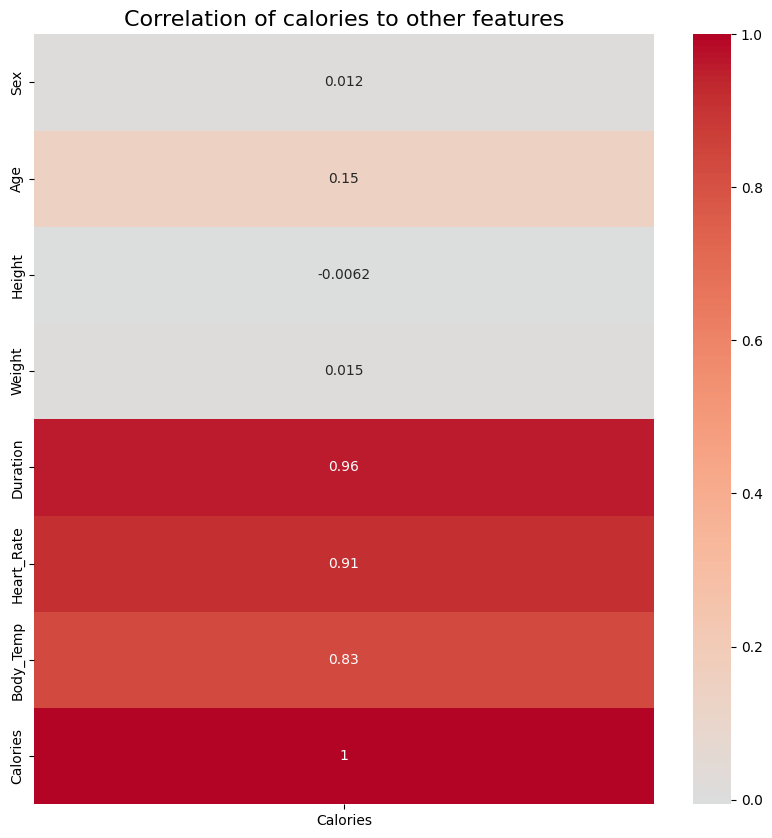

In [ ]:
# let's visualize to make it more obvious
plt.figure(figsize=(10, 10))
sns.heatmap(cal_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of calories to other features', fontsize=16)
plt.show()

It shows that 'Duration' and 'Heart Rate' are highly correlated to the Calories burnt during training. Besides than those, Body temperature during training has considerable correlation to Calories. Other features have no direct effect on our target feature.

Text(0.5, 1.0, 'Correlation of features')

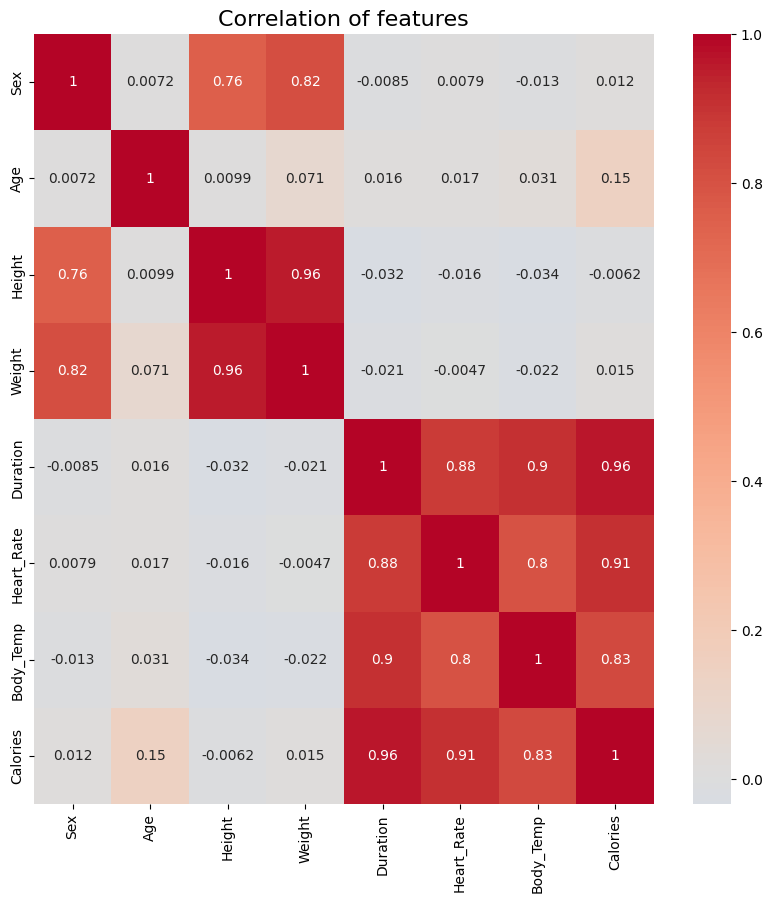

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation of features', fontsize=16)

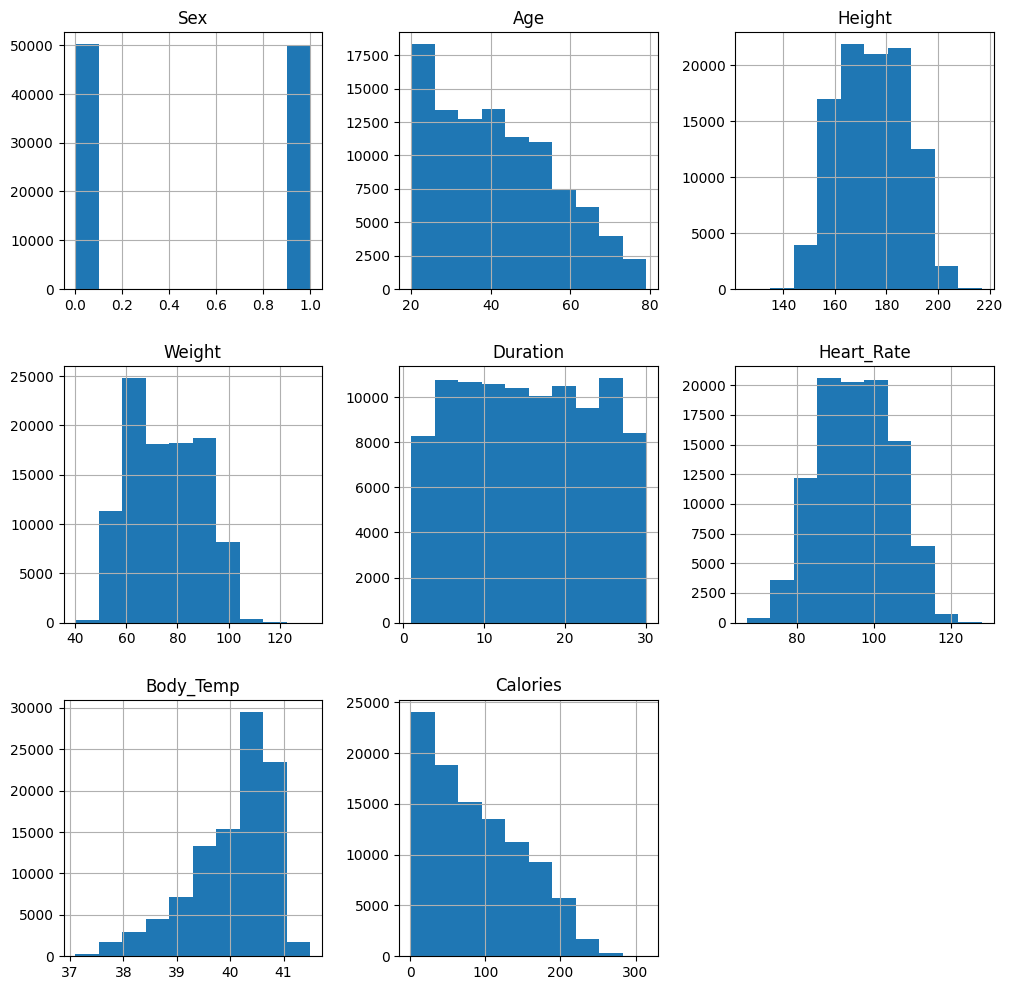

In [ ]:
df.hist(figsize=(12,12))
plt.show()

We see that some of them normally distributed. Nevertheless, we have some features('Body_Temp', 'Age', 'Calories') which can degrade our model's performance for it not having normal distriburion. If that's the case we'll use log transforming in our pipeline to make it sure that there is nothing wrong with distribution that affects our model's performance.

# Splitting data to Train and Test

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Calories', axis=1)
y = df['Calories']

In [ ]:
# we'll scale our data then
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# I decided to use 'test_size=0.1', because we have 750000 data and 20 percent of that is way more for a test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90000, 7), (10000, 7), (90000,), (10000,))

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.score(X_train, y_train)

0.9683991902434761

In [ ]:
lr.score(X_test, y_test)

0.9680958149664792

In [ ]:
# let's check our mean absolote error(MAE)
from sklearn.metrics import mean_absolute_error
y_pred = lr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

Mean Absolute Error: 8.06


In [ ]:
# let's check our mean squared error(MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 124.83


Our MAE and MSE suggests that our model's performance is pretty well. But we need to analyse where it makes the most of the mistakes. MSE results suggests we have some big calorie mistakes meaning we have some outliers. Because squaring increases effect of larger errors and it directly affects our MSE score.

# Error Analysis (Linear Regression)

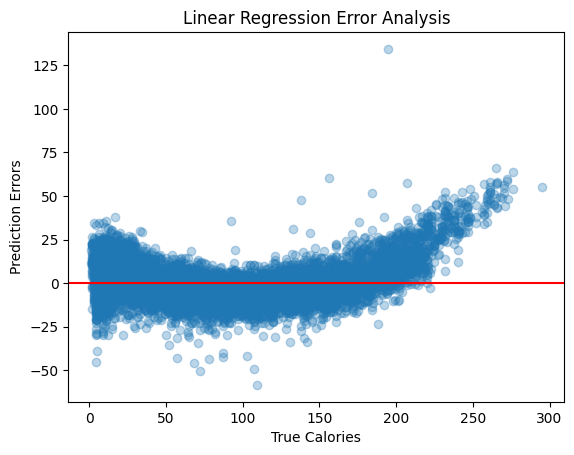

In [ ]:
errors = y_test - y_pred
plt.scatter(y_test, errors, alpha=0.3)
plt.axhline(0, color='r')
plt.xlabel('True Calories')
plt.ylabel('Prediction Errors')
plt.title('Linear Regression Error Analysis')
plt.show()

On the scatterplot above, we can see that we have some bigger mistakes for bigger calorie expenditures. This is what we assumed. This pushed our MSE to get higher because of that being sensitive to outliers.

array([[<Axes: title={'center': 'Calories'}>]], dtype=object)

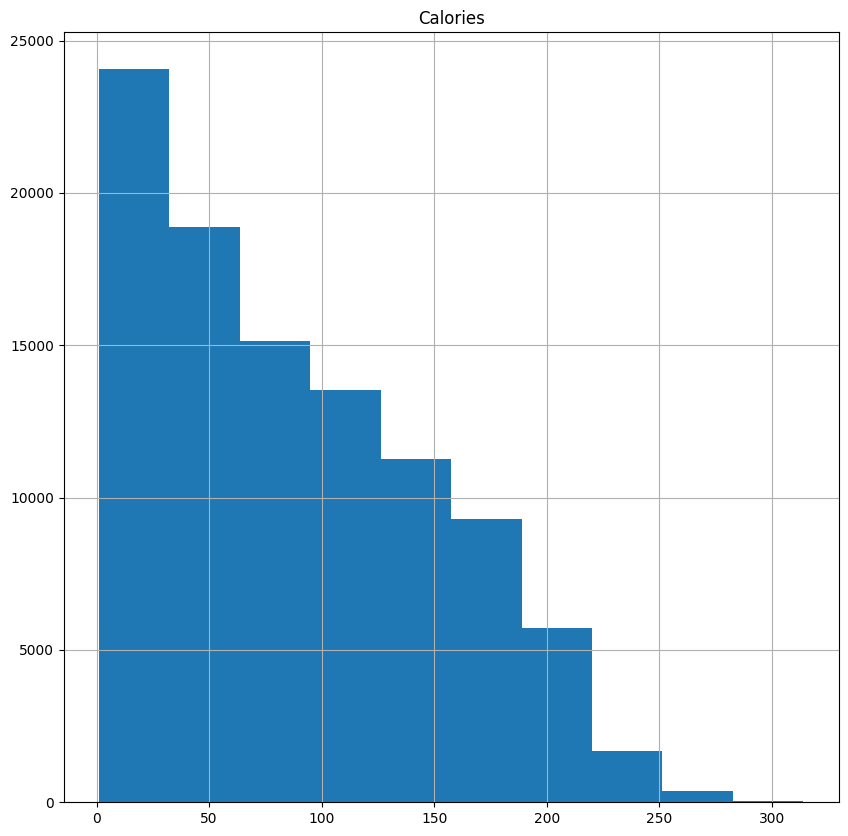

In [ ]:
df.hist(column='Calories', figsize=(10,10))

I've visualized this again to see what happens more clearly. Our target feature ('Calories') has right-skewness(long tail with large values). It means we have less frequency on larger values. That also affects to MSE because our model is used to see smaller values and is good predicting not larger values.

# Predictive system (Linear Regression)

In [ ]:
df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

In [ ]:
df.dtypes

,0
Sex,int64
Age,int64
Height,int64
Weight,int64
Duration,int64
Heart_Rate,int64
Body_Temp,float64
Calories,float64


In [ ]:
# Getting user input
sex = int(input('Enter your sex (0 for female, 1 for male): '))
age = int(input('Enter your age: '))
height = int(input('Enter your height (in centimeters): '))
weight = int(input('Enter your weight (in kilograms): '))
duration = int(input('Enter the duration of training (in minutes): '))
heart_rate = int(input('Enter your heart rate during training (in beats per minute): '))
body_temp = float(input('Enter your body temperature during training (in degrees Celsius): '))


# Combining user input into a list
user_data = [[sex, age, height, weight, duration, heart_rate, body_temp]]

# Getting the original column names before scaling and converting to Pandas df
original_column_names = df.drop('Calories', axis=1).columns
user_df = pd.DataFrame(user_data, columns=original_column_names)

# Scaling the user input using the same scaler fitted on the training data
user_scaled = scaler.transform(user_df)
predicted_calories = lr.predict(user_scaled)

print(f"Predicted calorie expenditure: {predicted_calories[0]:.2f}")

Enter your sex (0 for female, 1 for male): 0
Enter your age: 35
Enter your height (in centimeters): 170
Enter your weight (in kilograms): 70
Enter the duration of training (in minutes): 20
Enter your heart rate during training (in beats per minute): 92
Enter your body temperature during training (in degrees Celsius): 40.7
Predicted calorie expenditure: 97.20


Results by predictive system shows that our model works pretty well. And usually ±10 calories mistake in Diet and Fitness apps is acceptable.

In [ ]:
# 44	female	21	161	56	18	98	40.5	92
# 45	male	32	208	104	19	98	40	    101
# 46	female	50	171	64	28	116	41.2	214
# 47	female	35	170	70	20	92	40.7	92   # this is the one I used in predictive system above
# 48	female	45	183	82	25	99	41.1	136
# 49	female	26	180	72	18	102	40.4	98
# 50	female	25	164	65	7	91	39.8	31
# 51	male	65	169	74	16	102	40.3	110
# 52	male	34	179	88	4	86	39.1	15

# Gradient Boosting Regressor

Gradient Boosting Regressor (GBR) is an ensemble method which works well with nonlinearity in data and uses gradient descent to minimize loss function. GBR also deals better with outliers than Linear Regression and often achieves state-of-the-art accuracy in regression tasks.
In general, GBR outperforms Linear Regression

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
gbr.score(X_train, y_train)

0.9945226657394205

In [ ]:
gbr.score(X_test, y_test)

0.9942220853124942

There is no overfitting or underfitting.

In [ ]:
y_pred = gbr.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 3.10
Mean Squared Error: 22.61


We see that MAE and MSE of GBR is way better than Linear Regression's MAE and MSE. Not being sensitive to outliers and working with nonlinearity of GBR made our model perform better without even using log transforming or anything else.

# Error Analysis (GBR)

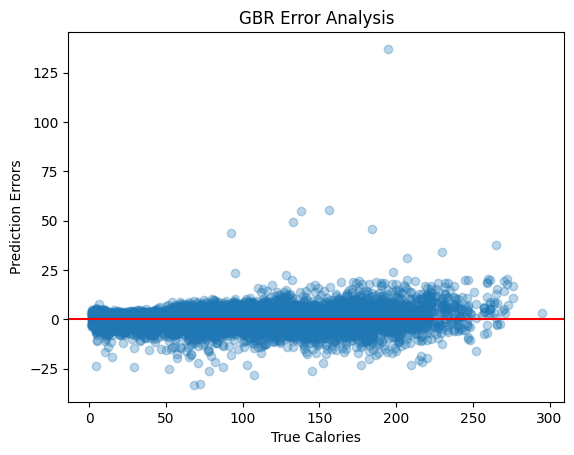

In [ ]:
errors = y_test - y_pred
plt.scatter(y_test, errors, alpha=0.3)
plt.axhline(0, color='r')
plt.xlabel('True Calories')
plt.ylabel('Prediction Errors')
plt.title('GBR Error Analysis')
plt.show()

In the visualization above we can easily see that there is considerable difference with LR's in errors.

# Predictive system (GBR)

In [ ]:
# Getting user input
sex = int(input('Enter your sex (0 for female, 1 for male): '))
age = int(input('Enter your age: '))
height = int(input('Enter your height (in centimeters): '))
weight = int(input('Enter your weight (in kilograms): '))
duration = int(input('Enter the duration of training (in minutes): '))
heart_rate = int(input('Enter your heart rate during training (in beats per minute): '))
body_temp = float(input('Enter your body temperature during training (in degrees Celsius): '))


# Combining user input into a list
user_data = [[sex, age, height, weight, duration, heart_rate, body_temp]]

# Getting the original column names before scaling and converting to Pandas df
original_column_names = df.drop('Calories', axis=1).columns
user_df = pd.DataFrame(user_data, columns=original_column_names)

# Scaling the user input using the same scaler fitted on the training data
user_scaled = scaler.transform(user_df)
predicted_calories = gbr.predict(user_scaled)

print(f"Predicted calorie expenditure: {predicted_calories[0]:.2f}")

Enter your sex (0 for female, 1 for male): 0
Enter your age: 25
Enter your height (in centimeters): 153
Enter your weight (in kilograms): 53
Enter the duration of training (in minutes): 22
Enter your heart rate during training (in beats per minute): 95
Enter your body temperature during training (in degrees Celsius): 40.8
Predicted calorie expenditure: 105.31


Actual calorie expenditure for exact values as above is 109, and in the following cell I have attached some actual data from our dataset

In [ ]:
# 557065	female	25	153	53	22	95	40.8	109 # this is the one I used in predictive system above
# 557066	male	42	190	98	25	113	40.6	200
# 557067	female	65	158	57	26	108	40.9	176
# 557068	female	21	172	70	21	106	40.4	123
# 557069	female	38	164	59	6	86	39.5	26
# 557070	male	23	194	101	16	94	40.5	66
# 557071	male	58	184	91	25	106	40.7	193
# 557072	female	25	159	59	19	102	40.2	108
# 557073	female	30	167	64	20	99	40.7	110
# 557074	female	34	159	58	28	105	40.8	172